# Исследование о продаже компьютерных игр в интернет-магазине «Стримчик»


Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) в интернет-магазине компьютерных игр «Стримчик». Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(5)
#выведем 5 первых строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.sample(5)
#выведем 5 случайных строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11143,Lethal Enforcers,SNES,1993.0,Shooter,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10770,The Secret Saturdays: Beasts of the 5th Sun,Wii,2009.0,Action,0.09,0.00,0.00,0.01,60.0,tbd,E10+
781,Tony Hawk's Pro Skater,N64,2000.0,Sports,1.68,0.40,0.00,0.03,NaN,NaN,NaN
11985,Bleach: Heat the Soul 3,PSP,2006.0,Fighting,0.00,0.00,0.07,0.00,NaN,NaN,NaN
2590,Darksiders II,X360,2012.0,Action,0.45,0.27,0.00,0.07,83.0,8,M


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.describe()
# посмотрим на основные показатели описательной статистики, чтобы определить возможные аномалии в данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Датафрейм содержит 16714 строк.  
В некоторых колонках, таких как название игры, год выпуска, жанр, рейтинг критиков и пользователей, содержатся пропуски. Их необходимо обработать или удалить строки с пропусками.   
В столбце `Year_of_Release` необходимо изменить тип данных на целочисленный "int". В столбце `User_Score` - на "float".
В данных по продажам в различных регионах есть аномальные (сверхвысокие) значения. Необходимо проверить корреткность значений.

### Подготовка данных

In [7]:
games.columns = [x.lower() for x in games.columns]
#приведем названия колонок к нижнему регистру

In [8]:
games.isna().sum()
#посчитаем пропуски в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
games.isnull().mean() * 100
#посчитаем процент пропусков в колонках

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Пропуски в стобцах `name`, `genre`, `year_of_release` необходимо обработать, т.к. данные дальше пригодятся в исследовании.  
В столбцах `critic_score`, `user_score`, `rating` пропусков достаточно много - почти половина общего количества строк.

In [10]:
games[games['name'].isna()]
#выведем на экран строки с пропусками в столбце "name"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games[games['genre'].isna()]
#выведем на экран строки с пропусками в столбце "genre"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в имени игры и жанре содержатся в одних и тех же строках: с играми 1993 годами выпуска. Можем удалить эти строки, так как далее они нам точно не пригодятся в анализе.

Т.к. пропуски в столбце с годом выпуска составляют менее 2%, а данные с годами выпуска нужны для дальнейшего анализа, избавимся от строк, содержащие пропуски годов

In [12]:
games[games['year_of_release'].isna()].describe()
#перед удалением взглянем на строки, чтобы удоствериться, что важные данные не изчезнут после удаления

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [13]:
games = games.dropna(subset=['year_of_release', 'name', 'genre'])
#удалим строки с пропусками в столбцах с годом выпуска, жанром и именем игры

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int')
#приведем тип данных в столбце с годом выпуска к целочисленному

In [15]:
games['user_score'].unique()
#посмотрим на уникальные значения в столбце "user_store"

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
games[games['user_score'] == 'tbd']
#выведем на экран строки, в которых оценка пользователя указана "tbd"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2376 строк, в которых оценка пользователя указана "tbd". Tbd (to be determined) означает, что рейтинг еще не сформировался, поэтому целесообразно заменить эти значения на NaN.

In [17]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
#заменим "tbd" на "nan" в столбце с пользовательской оценкой

In [18]:
games['user_score'].unique()
#проверим, что изменения внеслись

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
games['user_score'] = games['user_score'].astype('float')
#изменим тип данных в столбце с пользовательской оценкой на "float"

In [20]:
games['rating'].unique()
#посмотрим, какие значения содержатся в категориальной переменной `rating`

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
games['rating'].value_counts()
#а также на количественное распределение этих значений в переменной `rating`

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Всего по 1 игре с рейтингами "AO", "RP", 3 игры с рейтингом "K-A", который теперь называется "E". Переименуем его в "E".

In [22]:
games['rating'] = games['rating'].replace('K-A', 'E')
#переименуем рейтинг K-A в E

In [23]:
games['rating'] = games['rating'].fillna('unknown')
#Т.к. переменная категориальная, заменим пропуски на значение "unknown"

In [24]:
games.info()
# проверим, что пропуски обработаны и тип данных изменился

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
games.duplicated().sum()
#проверим, есть ли полные дубликаты

0

In [26]:
games['platform'].unique()
#выполним поиск неявных дубликатов в столбце "platforms"

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
games['genre'].unique()
#выполним поиск неявных дубликатов в столбце "genre"

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [28]:
games.describe()
# посмотрим на основные показатели описательной статистики, чтобы определить возможные аномалии в данных

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Подозрительные значения в столбцах с продажами. Посмотрим на эти данные подробнее.

In [29]:
games[games['na_sales'] == games['na_sales'].max()]
#выведем на экран строку с максимальными продажами в Северной Америке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


Видим, что рекордные продажи составили не только в Северной Америке, высокие значения также в Европе и других странах, поэтому это не аномалии.

In [30]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

**Вывод:**
1. Обработаны пропуски в столбцах `name`, `genre`, `year_of_release`.
2. Изменен тип данных в столбцах `year_of_release` и `user_score`.
3. Обработаны строки, содержащие значения "tbd" в столбце `user_score` - значения заменены на "NaN"
4. В столбце `rating` переименованы значения 3 игр с рейтингом "K-A", который теперь называется "E".

Наиболее вероятные причины появления пропусков:  
 * критики и пользователи оценивали не все игры;
 * пропуски в столбце `rating` связаны с тем, что рейтинг ESRB появился в 1994, а данные содержатся с 1980 года

### Исследовательский анализ данных

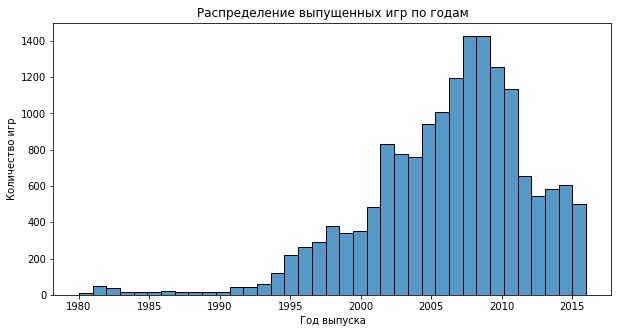

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(data=games, x='year_of_release', bins=37)

plt.title('Распределение выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

До 1991 года игры практически не выпускались. С конца 90-х по 2008 год количество выпущенных игр росло, однако с 2009 года наблюдается резкое снижение. С 2012 года количество выпускаемых игр в год стабилизировалось.  
Для прогноза на 2017 год могут быть важны данные с 2012 года, так как динамика количества выпущенных игр стабилизировалась.

In [32]:
games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)
#сгруппируем платформы по суммарным продажам игр

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

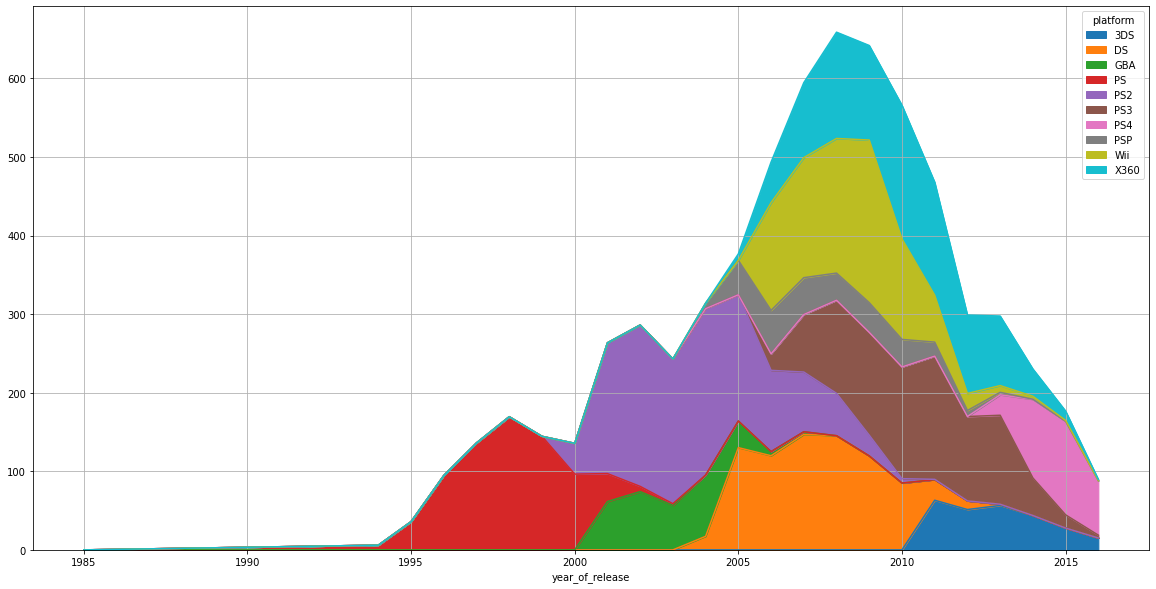

In [33]:
(
    games[games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'])]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot.area(grid=True, figsize=(20,10))
)
plt.show()

In [34]:
platform_life = games.pivot_table(index='year_of_release', columns='platform', values='total_sales')
# построим сводную таблицу, одной осью которой будет год выпуска, второй осью - платформа, значениями - продажи

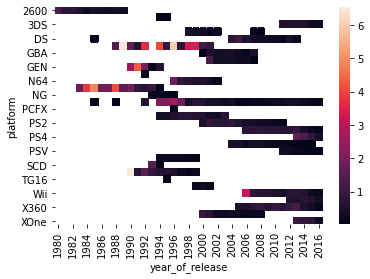

In [35]:
sns.heatmap(platform_life.T)
plt.show()
# построим хитмэп, на котором виден жизненный цикл каждой платформы

In [36]:
print(f'Средний жизненный цикл платформы составляет {round(((~platform_life.isna()).sum()).mean(),1)} лет')

Средний жизненный цикл платформы составляет 7.7 лет


На графике видно, что большая часть платформ уже устарела и игры на ней не выпускаются. В среднем платформы появляются каждые 3-4 года и изчезают приблизительно через 7-8 лет.

Для того, чтобы построить прогноз на 2017 год, необходимо брать максимально схожие данные за ближайший период.  
Лучше всего подходят данные за 2015-2016 года.  
Эти данные включают в себя актуальные платформы на конец 2016 года, а также имеют стабильную динамику.

In [37]:
games = games.query('2015 <= year_of_release')
# оставим только данные с 2015 года

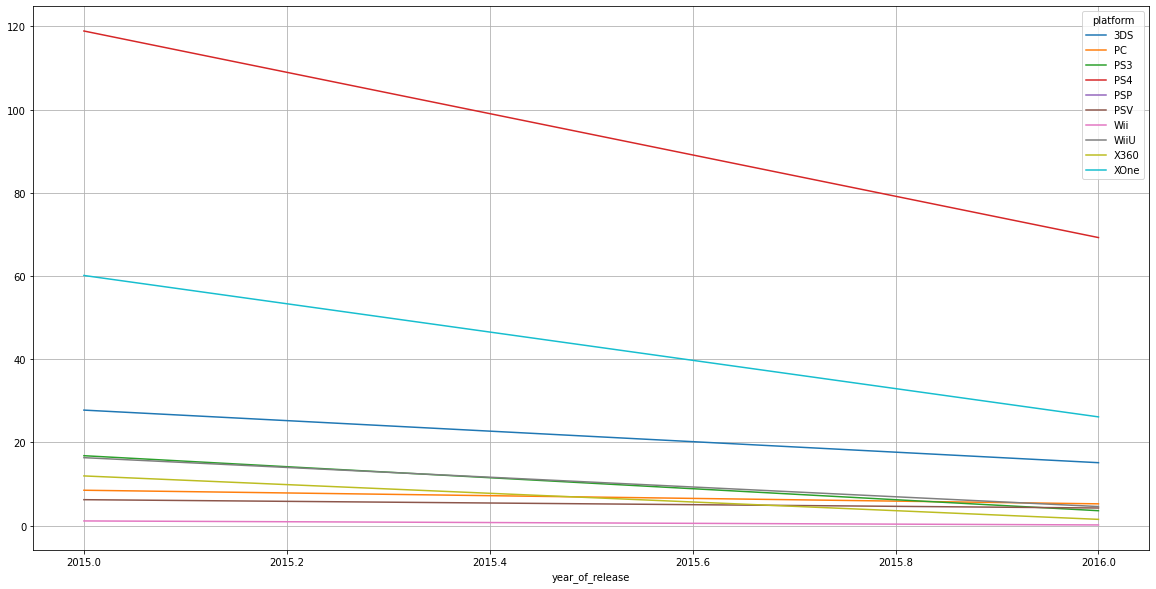

In [38]:
(
    games
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(20,10))
)
plt.show()
#покажем на графике динамику продаж игр на различных платформах

In [39]:
(
    games
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .style
    .format("{:.2f}")
    .background_gradient(cmap='Greens', axis=1)
)
#покажем в табличном виде динамику продаж игр на различных платформах

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,nan,4.25,0.18,4.60,1.52,26.15


У всех платформ отрицательная динамика продаж.  
Выделим 6 потенциально прибыльных платформ:
* PS4
* XOne
* 3DS
* PC
* WiiU
* PSV

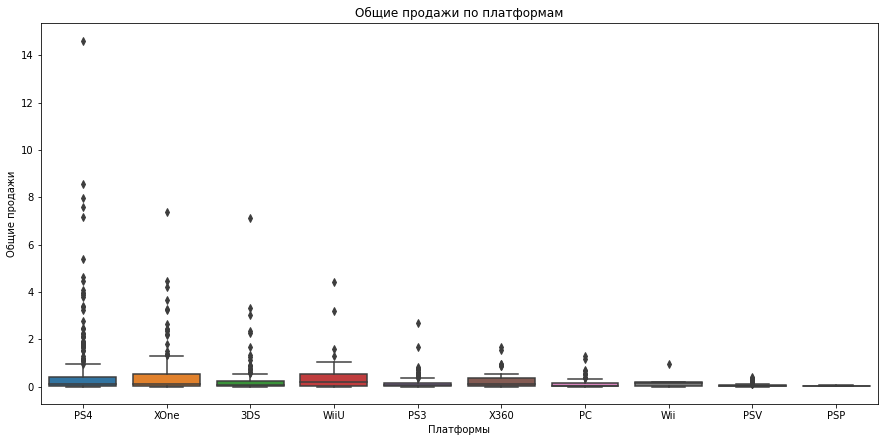

In [40]:
plt.figure(figsize=(15, 7))
(sns.boxplot(data = games, y = 'total_sales', x='platform')
    .set(title = 'Общие продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ))

plt.show()
# построим график boxplot с общими данными для оценки выбросов

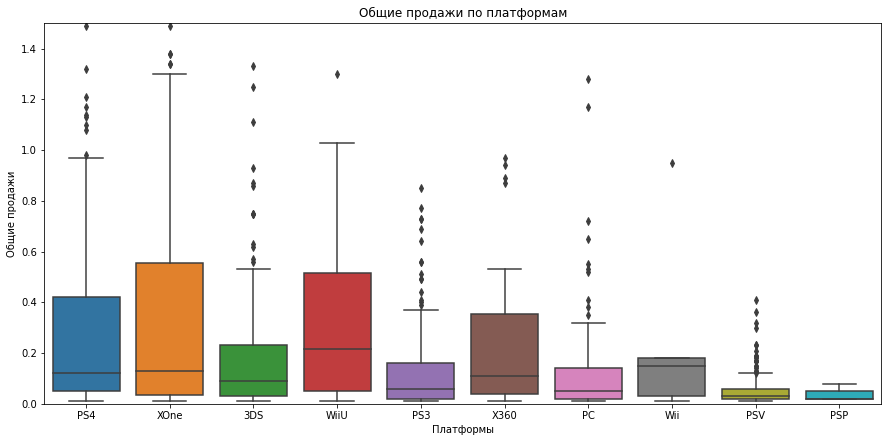

In [41]:
plt.figure(figsize=(15, 7))
(sns.boxplot(data = games, y = 'total_sales', x='platform')
    .set(title = 'Общие продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 1.5)))

plt.show()
# ограничим данные на графике boxplot для оценки квартилей по платформам

* Примечательно, что наборы данных по продажам практически по всем платформам имеют распределение скошенное вправо. Об этом свидетельствует то, что медиана находится рядом с нижним квартилем.  
Следовательно, можем сделать вывод, что **наблюдается преобладание игр с небольшими продажами**. А популярность платформам приносят лишь несколько игр, продажи которых "выстреливают".
* Медианные продажи по каждой платформе не превышают 0.2 млн копий.  Однако практически на каждой платформе, а особенно на наиболее популярных, есть игры, суммарные продажи которых во много раз превышают медианные значения. Удалять такие данные не будем, т.к. такие значения, возможно, обусловлены тем, что продажи некоторых игр "выстрелили".

Посмотрим, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

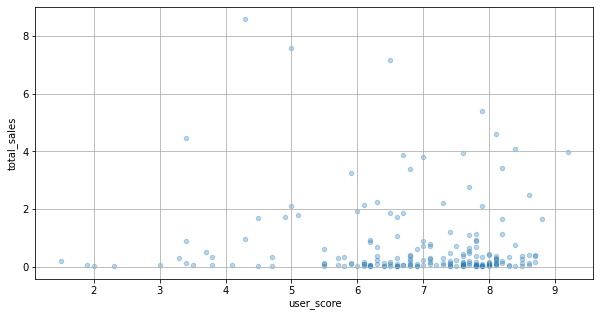

Корреляция продаж игр на платформе PS4 и оценок пользователей: -0.06


In [42]:
#построим диаграмму рассеяния, где для каждого значения пользовательской оценки будет отдельная точка с общей суммой продаж
(
    games[games['platform'] == 'PS4']
    .plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(10,5), alpha=0.3)
)
plt.show()

#рассчитаем коэффициент корреляции между общим количеством продаж игры и оценками пользователей

print('Корреляция продаж игр на платформе PS4 и оценок пользователей:', games[games['platform'] == 'PS4']['total_sales'].corr(games['user_score']).round(2))

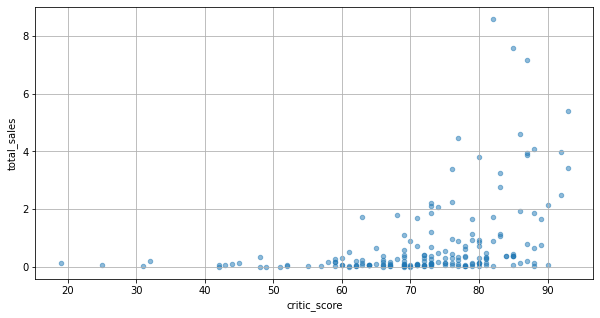

Корреляция продаж игр на платформе PS4 и оценок критиков: 0.39


In [43]:
#построим диаграмму рассеяния, где для каждого значения оценки критиков будет отдельная точка с общей суммой продаж
(
    games[games['platform'] == 'PS4']
    .plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(10,5), alpha=0.5)
)
plt.show()

#рассчитаем коэффициент корреляции между общим количеством продаж игры и оценками критиков

print('Корреляция продаж игр на платформе PS4 и оценок критиков:', games[games['platform'] == 'PS4']['total_sales'].corr(games['critic_score']).round(2))

**Выводы:** 
* Влияние оценок критиков оказывает большее значение на продажи игр, чем оценки пользователей.
* Корреляция продаж игр и оценок пользователей практически отсутствует.

Соотнесем выводы с продажами игр на других платформах. 
Для этого построим аналогичные диаграммы рассеяния для данных с играми на платформах XOne, 3DS и PC.

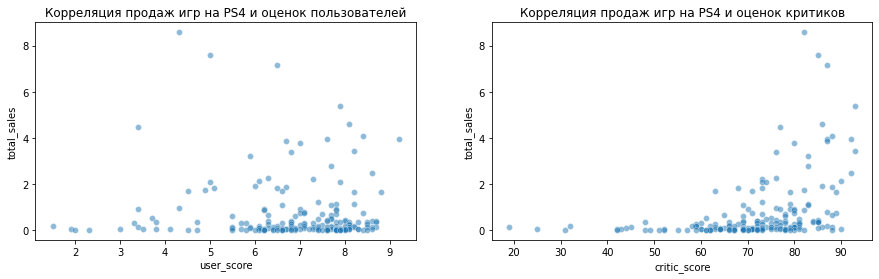

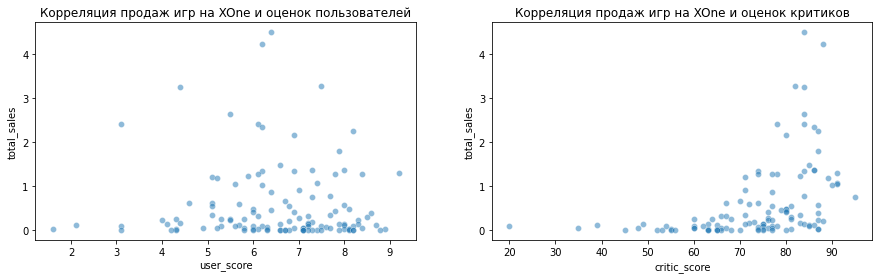

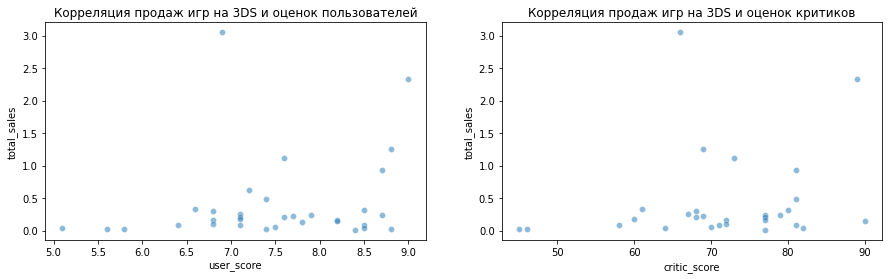

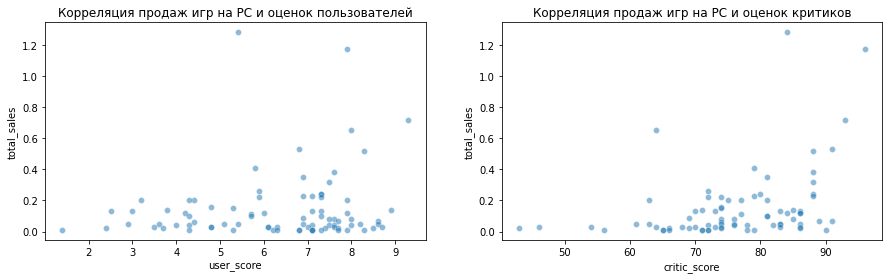

In [44]:
#построим диаграммы рассеяния для платформ, где для каждого значения пользовательской оценки будет отдельная точка с общей суммой продаж

for i in ['PS4', 'XOne', '3DS', 'PC']:
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    sns.scatterplot(data= games[games['platform'] == i], x='user_score', y='total_sales', ax=axes[0], alpha=0.5).set(title=f'Корреляция продаж игр на {i} и оценок пользователей')
    sns.scatterplot(data= games[games['platform'] == i], x='critic_score', y='total_sales', ax=axes[1], alpha=0.5).set(title=f'Корреляция продаж игр на {i} и оценок критиков')

In [45]:
for i in ['PS4', 'XOne', '3DS', 'PC']:
    print(f'Корреляция продаж игр на платформе {i} и оценок пользователей:', games[games['platform'] == i]['total_sales'].corr(games['user_score']).round(2))
    print(f'Корреляция продаж игр на платформе {i} и оценок критиков:', games[games['platform'] == i]['total_sales'].corr(games['critic_score']).round(2))
    print()
#рассчитаем коэффициенты корреляции между общим количеством продаж игры и оценками пользователей

Корреляция продаж игр на платформе PS4 и оценок пользователей: -0.06
Корреляция продаж игр на платформе PS4 и оценок критиков: 0.39

Корреляция продаж игр на платформе XOne и оценок пользователей: -0.04
Корреляция продаж игр на платформе XOne и оценок критиков: 0.43

Корреляция продаж игр на платформе 3DS и оценок пользователей: 0.2
Корреляция продаж игр на платформе 3DS и оценок критиков: 0.18

Корреляция продаж игр на платформе PC и оценок пользователей: 0.15
Корреляция продаж игр на платформе PC и оценок критиков: 0.38



**Вывод:**   
Для наиболее популярных платформ, таких как PS4 и XOne, корреляция продаж игр и оценок пользователей практически отсутствует.  
Для менее крупных платформ - 3DS, PC, корреляция положительная, но слабая - составляет около 0.2. Хотя стоит заметить, что и количество оценок в разы меньше, чем у PS4 и ХOne.  
Со взаимосвязью продаж игр и оценками критиков ситуация обстоит иначе.  
Для PS4, XOne и PC корреляция продаж игр и оценок критиков умеренная - около 0.4. Наблюдается средняя корреляция: выше оценки критиков - больше продаж игры.  
Для 3DS - корреляция также положительная, но слабая, в отличие от трех других платформ, и составляет 0.2.  

По результатам анализа сформулируем вывод: **Оценки критиков оказывают большее значение на продажи игр, чем оценки пользователей.**

In [46]:
games.groupby('genre')['name'].agg('count').sort_values(ascending=False)
#посмотрим на распределение количества выпущенных игр по жанрам

genre
Action          431
Role-Playing    132
Adventure       110
Sports          107
Shooter          81
Misc             71
Racing           42
Fighting         37
Simulation       33
Strategy         29
Platform         28
Puzzle            7
Name: name, dtype: int64

In [47]:
games.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False)
#посмотрим на распределение продаж игр по жанрам

genre
Shooter         105.73
Action          102.13
Sports           64.33
Role-Playing     55.82
Misc             14.17
Fighting         12.37
Adventure        11.98
Racing           10.86
Platform          9.28
Simulation        7.55
Strategy          2.98
Puzzle            0.72
Name: total_sales, dtype: float64

In [48]:
games.groupby('genre')['total_sales'].agg('mean').sort_values(ascending=False)
#посмотрим на распределение продаж игр по жанрам

genre
Shooter         1.305309
Sports          0.601215
Role-Playing    0.422879
Fighting        0.334324
Platform        0.331429
Racing          0.258571
Action          0.236961
Simulation      0.228788
Misc            0.199577
Adventure       0.108909
Puzzle          0.102857
Strategy        0.102759
Name: total_sales, dtype: float64

**Вывод:**   
* По количеству выпущенных игр лидируют экшн, ролевые игры и приключения.  
* Наибольшей популярностью (вывод по среднему количеству проданных копий) пользуются шутеры, спорт и ролевые игры.
* Почти не пользуются популярностью приключения, стратегии и пазл.


###  Составим портрет пользователя каждого региона

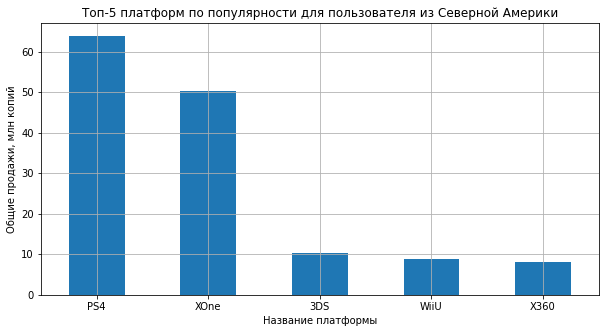

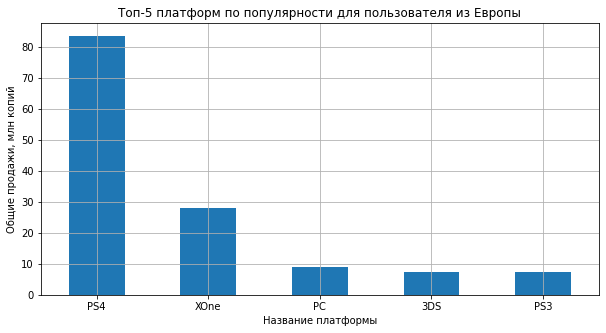

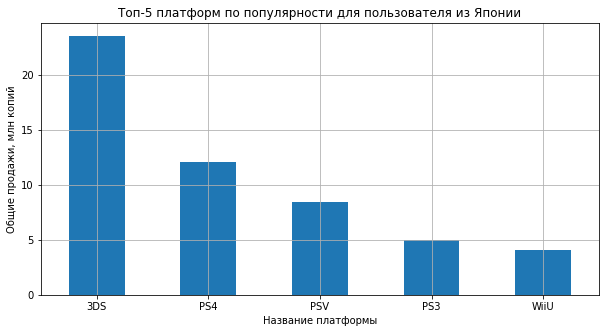

In [49]:
#построим гистограммы, отображающие распределение топ-5 платформ по популярности для пользователей Северной Америки, Европы и Японии 

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games.groupby('platform')[i].agg('sum')
        .sort_values(ascending=False).head(5)
        .plot(x='platform', y=i, kind='bar', grid=True, figsize=(10,5), rot=0)
    )
    if i == 'na_sales':
        plt.title('Топ-5 платформ по популярности для пользователя из Северной Америки')
    elif i == 'eu_sales':
        plt.title('Топ-5 платформ по популярности для пользователя из Европы')
    elif i == 'jp_sales':
        plt.title('Топ-5 платформ по популярности для пользователя из Японии')

    plt.xlabel('Название платформы')
    plt.ylabel('Общие продажи, млн копий')
    plt.show()

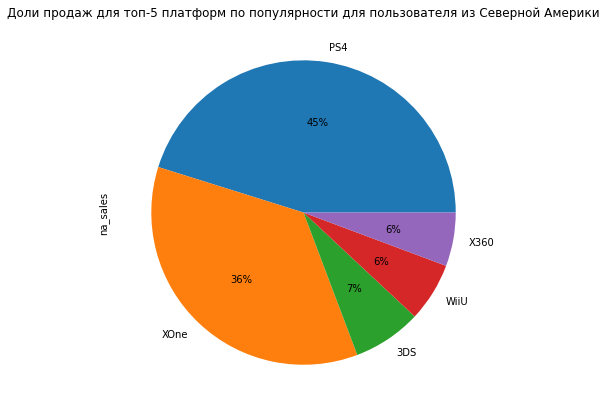

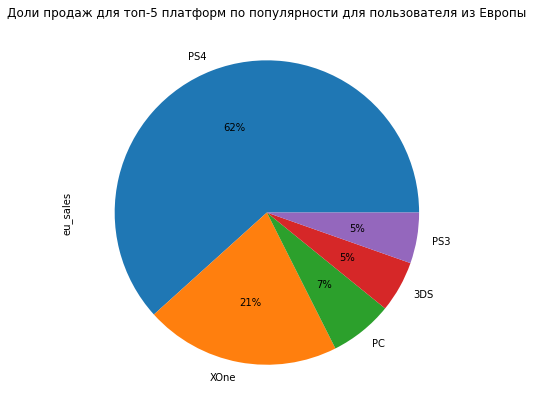

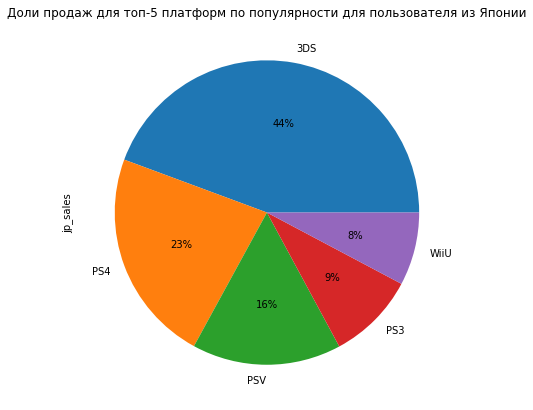

In [50]:
# на круговых диаграммах отобразим доли продаж для пользователей Северной Америки, Европы и Японии

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games.groupby('platform')[i].agg('sum')
        .sort_values(ascending=False).head(5)
    .plot(x='platform', y='eu_sales', kind='pie', grid=True, figsize=(12,7), autopct='%1.0f%%')
    )
    if i == 'na_sales':
        plt.title('Доли продаж для топ-5 платформ по популярности для пользователя из Северной Америки')
    elif i == 'eu_sales':
        plt.title('Доли продаж для топ-5 платформ по популярности для пользователя из Европы')
    elif i == 'jp_sales':
        plt.title('Доли продаж для топ-5 платформ по популярности для пользователя из Японии')
    plt.show()

**Вывод:**
1. Наиболее популярная платформа во всех трех регионах - PS4. Она входит в топ-3 по каждому из регионов.
2. В Северной Америке наибольшей популярностью пользуются платформы PS4 (45% от суммарных продаж игр) и XOne (36%). Разница несущественная и связана с тем, что пользователи активно поддерживают платформу, выпущенную в родной стране - XOne.
3. В Европе наиболее популярные платформы те же, что и в Северной Америке, однако разница уже существеннее - 62% у PS4 против 21% у XOne.
4. В Японии настолько сильная поддержка "родных" платформ, что XOne нет даже в топ-5. А самая популярная платформа - 3DS (Nintendo) - 44% от суммарных продаж игр приходится на ее долю. На втром месте расположилась PS4 c 23%.

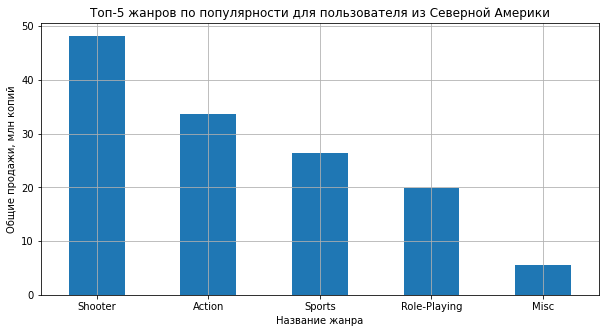

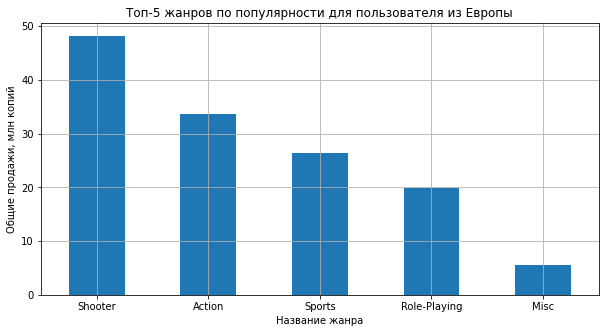

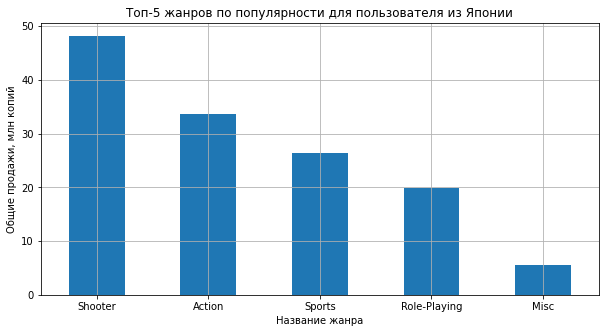

In [51]:
#построим гистограммы, отображающие распределение топ-5 жанров по популярности для пользователей Северной Америки, Европы и Японии 

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games.groupby('genre')['na_sales'].agg('sum')
        .sort_values(ascending=False).head(5)
        .plot(x='genre', y='na_sales', kind='bar', grid=True, figsize=(10,5), rot=0)
    )
    if i == 'na_sales':
        plt.title('Топ-5 жанров по популярности для пользователя из Северной Америки')
    elif i == 'eu_sales':
        plt.title('Топ-5 жанров по популярности для пользователя из Европы')
    elif i == 'jp_sales':
        plt.title('Топ-5 жанров по популярности для пользователя из Японии')

    plt.xlabel('Название жанра')
    plt.ylabel('Общие продажи, млн копий')
    plt.show()

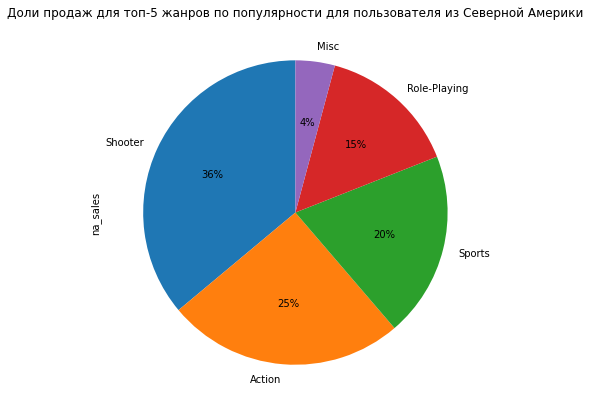

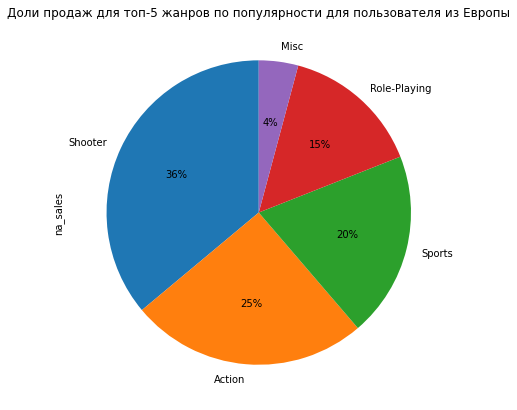

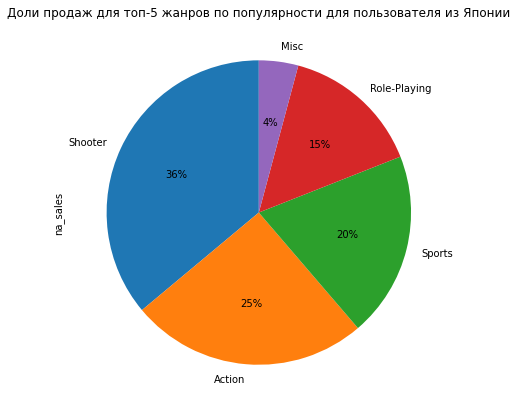

In [52]:
# на круговых диаграммах отобразим доли продаж игр топ-5 жанров по популярности для пользователей Северной Америки, Европы и Японии

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        games.groupby('genre')['na_sales'].agg('sum')
        .sort_values(ascending=False).head(5)
        .plot(x='genre', y='na_sales', kind='pie', grid=True, figsize=(7,7), autopct='%1.0f%%', startangle=90)
    )
    if i == 'na_sales':
        plt.title('Доли продаж для топ-5 жанров по популярности для пользователя из Северной Америки')
    elif i == 'eu_sales':
        plt.title('Доли продаж для топ-5 жанров по популярности для пользователя из Европы')
    elif i == 'jp_sales':
        plt.title('Доли продаж для топ-5 жанров по популярности для пользователя из Японии')
    plt.show()

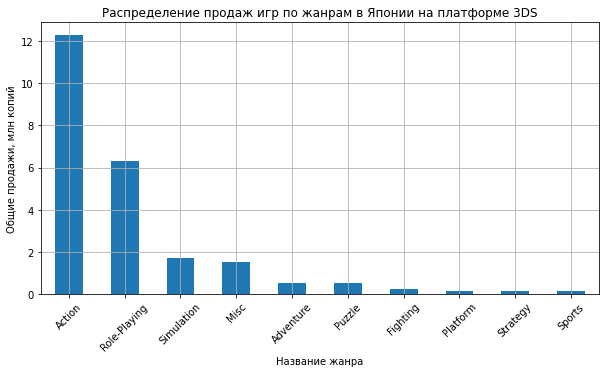

In [53]:
(
    games[games['platform'] == '3DS']
    .groupby('genre')['jp_sales'].agg('sum')
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, figsize=(10,5), rot=45)
)
plt.title('Распределение продаж игр по жанрам в Японии на платформе 3DS')
plt.xlabel('Название жанра')
plt.ylabel('Общие продажи, млн копий')

plt.show()
    
#посмотрим на распределение продаж игр в разных жанрах на самой популярной платформе в Японии - 3DS

**Вывод:**
1. Вкусовые предпочтения у пользователей Северной Америки и Европы схожие: больше всего они предпочитают игры в жанрах шутеры, экшн, спорт. На эти три жанра прихолится порядка 80% проданных игр.
2. В Японии самые популярные жанры - экшн (50% от суммарных продаж игр) и ролевые игры (29%). А шутеры и спорт, в отличие от Северной Америки и Европы, практически не пользуются популярностью.
3. Популярность жанров экшн и ролевые игры в Японии связана с тем, что половина продаж приходится на игры, выпускаемые на самой популярной платформе - 3DS.


In [55]:
ESRB_dict = {'E': 'Для всех', 'M': 'От 17 лет', 'T': 'От 13 лет', 'E10+': 'От 10 лет','K-A': 'Для всех', 'unknown': 'Неизвестен'}
games['ESRB_description'] = games['rating'].map(ESRB_dict)

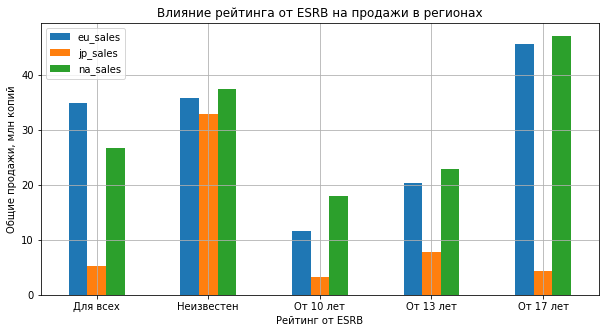

In [56]:
#построим гистограммы зависимости продаж и рейтинга ESRB по регионам
(
    games.pivot_table(index='ESRB_description', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', grid=True, figsize=(10,5), rot=0)
)
plt.title('Влияние рейтинга от ESRB на продажи в регионах')
plt.xlabel('Рейтинг от ESRB')
plt.ylabel('Общие продажи, млн копий')

plt.show()

**Вывод:**
1. В Северной Америке и Европе влияение рейтинга от ESRB на продажи сопоставимое. Наиболее высокие продажи у игр с рейтингом M - от 17 лет. А наименее низкие продажи у игр с рейтингом E10+ - от 10 лет.
2. По сравнению с Северной Америкой и Европой в Японии нет ощутимого влияния рейтинга на продажи. Однако небольшой перевес по суммарным продажам у игр с рейтингом T - для тинейджеров.

### Проверка гипотез

#### Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

*Нулевая гипотеза:* Средние пользовательские рейтинги платформ XOne и PC равны.  
*Альтернативная гипотеза:* Средние пользовательские рейтинги платформ XOne и PC отличаются.

In [57]:
sample_XOne = games[(games['platform'] == 'XOne') & (~games['user_score'].isna())]['user_score']
# первая выборка будет содержать пользовательские оценки для игр на платформе XOne

In [58]:
sample_PC = games[(games['platform'] == 'PC') & (~games['user_score'].isna())]['user_score']
# вторая выборка будет содержать пользовательские оценки для игр на платформе PC

In [59]:
print('Размер выборки sample_XOne:', len(sample_XOne))
print('Размер выборки sample_PC:', len(sample_PC))

Размер выборки sample_XOne: 121
Размер выборки sample_PC: 84


In [60]:
alpha=0.05
# критический уровень статистической значимости зададим 0.05
# если p-value окажется меньше него - отвергнем гипотезу

In [61]:
results = st.ttest_ind(sample_XOne, sample_PC, nan_policy='omit', equal_var = False)
# воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# так как размер выборок разный, параметр equal_var укажем как False

In [62]:
print('p-значение: ', results.pvalue)
# выведем на экран получившееся p-значение

if results.pvalue<alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# сравним получившееся p-значение с заданным уровнем статистической значимости

p-значение:  0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


#### Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*H0:* Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
*H1:* Средние пользовательские рейтинги жанров Action и Sports различаются.

In [63]:
sample_action = games[(games['genre'] == 'Action') & (~games['user_score'].isna())]['user_score']
# первая выборка будет содержать пользовательские оценки для игр на платформе XOne

In [64]:
sample_sports = games[(games['genre'] == 'Sports') & (~games['user_score'].isna())]['user_score']
# вторая выборка будет содержать пользовательские оценки для игр на платформе PC

In [65]:
print('Размер выборки sample_action:', len(sample_action))
print('Размер выборки sample_sports:', len(sample_sports))

Размер выборки sample_action: 193
Размер выборки sample_sports: 82


In [66]:
alpha=0.05
# критический уровень статистической значимости зададим 0.05
# если p-value окажется меньше него - отвергнем гипотезу

In [67]:
results = st.ttest_ind(sample_action, sample_sports, equal_var = False)
# воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# так как размер выборок разный, параметр equal_var укажем как False

In [68]:
print('p-значение: ', results.pvalue)
# выведем на экран получившееся p-значение

if results.pvalue<alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# сравним получившееся p-значение с заданным уровнем статистической значимости

p-значение:  5.97163549920592e-10
Нулевая гипотеза отвергается


**Вывод:**
1. Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась;
2. Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports подтвердилась.

### Общий вывод

1. Исходный датафрейм содержал данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) с 1980 по 2016 год.
2. Была проведена **подготовка данных**:
    * обработаны пропуски в столбцах `name`, `genre`, `year_of_release`.
    * Изменен тип данных в столбцах `year_of_release` на int и `user_score` - на float.
    * Обработаны строки, содержащие значения "tbd" в столбце `user_score` - значения заменены на "NaN"
    * В столбце `rating` переименованы значения 3 игр с рейтингом "K-A", который теперь называется "E".
3. Наиболее вероятные причины появления пропусков:  
     * критики и пользователи оценивали не все игры;
     * пропуски в столбце `rating` связаны с тем, что рейтинг ESRB появился в 1994, а данные содержатся с 1980 года
4. Большая часть платформ уже устарела и игры на ней не выпускаются. В среднем платформы **появляются каждые 3-4 года** и **изчезают** приблизительно **через 7-8 лет**.
5. Для прогноза рекламной кампании на 2017 год из исходного набора данных были выделены **актуальные данные - 2015-2016 гг.**, т.к. они включают в себя актуальные платформы на конец 2016 года, а также динамика продаж по платформам стабильная.
6. По данным на 2015-2016 гг. у всех платформ отрицательная динамика продаж
7. В качестве наиболее потенциально прибыльных платформ были **выбраны 6 платформ**:
    * PS4
    * XOne
    * 3DS
    * PC
    * WiiU
    * PSV
8. Наборы данных по продажам за 2015-2016гг. практически по всем платформам имеют распределение скошенное вправо.  Следовательно, можем сделать вывод, что **наблюдается преобладание игр с небольшими продажами**. А популярность платформам приносят лишь несколько игр, продажи которых "выстреливают".
9. **Медианные продажи** по каждой платформе **не превышают 0.2 млн копий**.  Однако практически на каждой платформе, а особенно на наиболее популярных, есть игры, суммарные продажи которых во много раз превышают медианные значения. Такие значения не удалены, т.к. они, скорее всего, обусловлены тем, что продажи некоторых игр "выстрелили".
10. **Оценки критиков оказывают большее значение на продажи игр, чем оценки пользователей**.
    * Для **наиболее популярных платформ**, таких как **PS4** и **XOne**, **корреляция продаж игр и оценок пользователей практически отсутствует**.  
    * Для **менее популярных платформ** - **3DS**, **PC**, **корреляция продаж и оценок пользователей** положительная, но **слабая** - составляет около 0.2. Хотя стоит заметить, что и количество оценок в разы меньше, чем у PS4 и ХOne.  
    * Для **PS4**, **XOne** и **PC** **корреляция продаж игр и оценок критиков умеренная** - около 0.4. Наблюдается средняя корреляция: выше оценки критиков - больше продаж игры.  
    * Для **3DS** - **корреляция продаж и оценок критиков** также положительная, но **слабая**, в отличие от трех других платформ, и составляет 0.2.  
11. **По количеству выпущенных игр** лидируют **экшн**, **ролевые игры** и **приключения**. **Наибольшей популярностью** (вывод по среднему количеству проданных копий) **пользуются** жанры **шутеры**, **спорт** и **ролевые игры**. Почти не пользуются популярностью **стратегии** и **пазл**.
12. **Наиболее популярная платформа** во всех трех регионах - **PS4**. Она входит в топ-3 по каждому из регионов.
13. **В Северной Америке наибольшей популярностью** пользуются платформы **PS4** (45% от суммарных продаж игр) и **XOne** (36%). Разница несущественная и связана с тем, что пользователи активно поддерживают платформу, выпущенную в родной стране - XOne.
14. **В Европе наиболее популярные платформы** те же, что и в Северной Америке - **PS4, XOne**, однако разница уже существеннее - 62% у PS4 против 21% у XOne.
15. **В Японии** настолько сильная поддержка "родных" платформ, что XOne нет даже в топ-5. А **самая популярная платформа** - **3DS** (Nintendo) - 44% от суммарных продаж игр приходится на ее долю. На втром месте расположилась PS4 c 23%.
16. Вкусовые предпочтения у пользователей **Северной Америки** и **Европы** схожие: больше всего они предпочитают игры в жанрах **шутеры, экшн, спорт**. На эти три жанра прихолится порядка 80% проданных игр.
17. **В Японии** самые популярные жанры - **экшн** (50% от суммарных продаж игр) и **ролевые игры** (29%). А шутеры и спорт, в отличие от Северной Америки и Европы, практически не пользуются популярностью.
18. Популярность жанров экшн и ролевые игры в Японии связана с тем, что половина продаж приходится на игры, выпускаемые на самой популярной платформе - 3DS.  
19. В **Северной Америке** и **Европе** влияение рейтинга от ESRB на продажи сопоставимое. **Наиболее высокие продажи** у игр с рейтингом **M - от 17 лет**. А **наименее низкие** продажи у игр с рейтингом **E10+ - от 10 лет**.
20. По сравнению с Северной Америкой и Европой в **Японии** нет ощутимого влияния рейтинга на продажи. Однако небольшой перевес по суммарным продажам у игр с рейтингом **"T - для тинейджеров"**.
21. Проведены проверки двусторонних гипотез:
    * Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC подтвердилась.
    * Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports подтвердилась.

Для прогноза рекламной кампании на 2017 год **необходимо учитывать популярность платформ** в разных регионах, **предпочтения в жанрах** у пользователей каждого региона. Также необходимо учитывать, что в Северной Америке и Европе лучше всего продаются игры с рейтингом **"М"**.